## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


##### Renaming, Descripitive Stats, Checking datatypes,null and duplicate values

In [3]:
data.rename(columns={'Unnamed: 0':'state'},inplace=True)
data

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data.isnull().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
data[data.duplicated()]

,state,Murder,Assault,UrbanPop,Rape


##### Checking Correlation between Variables

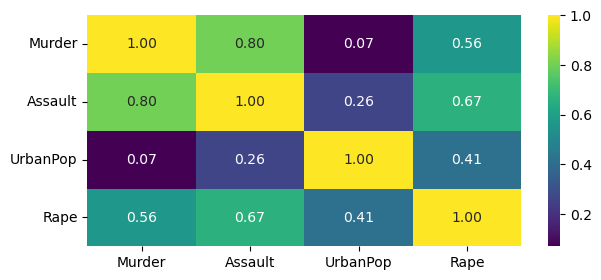

In [8]:
plt.figure(figsize=(7,3))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')
plt.show()

##### Checking Data distribution 

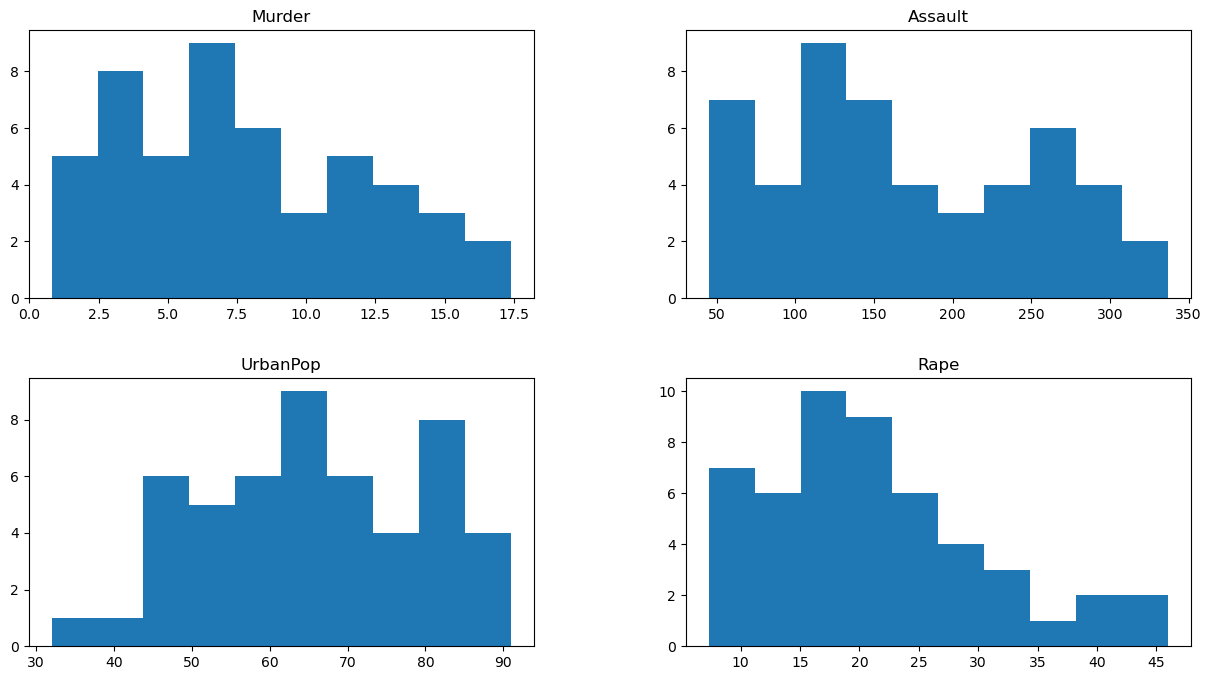

In [9]:
data.hist(figsize=(15,8),grid=False)
plt.show()

###### Normalizing The Data

In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Heirarchical Clustering 

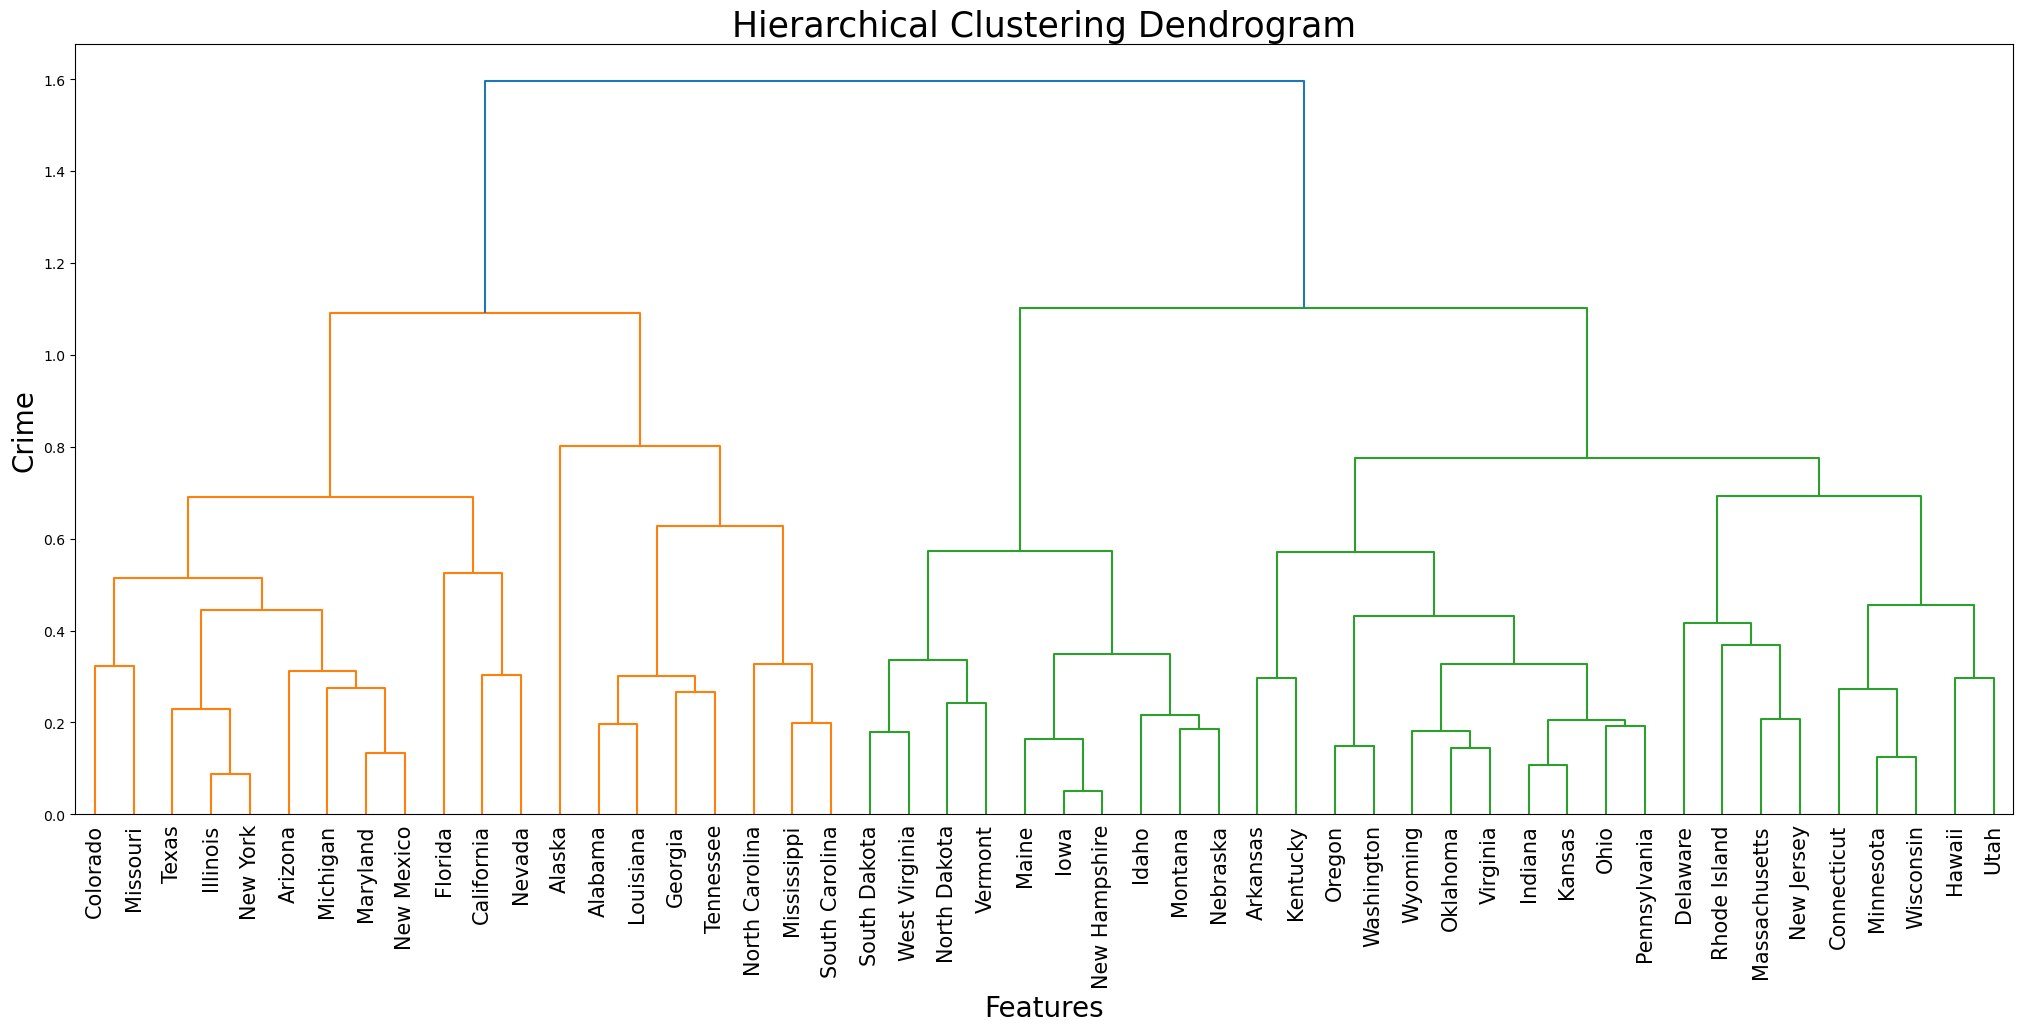

In [12]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram',fontsize=25)
plt.xlabel('Features',fontsize= 20)
plt.ylabel('Crime', fontsize= 20)
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'),orientation='top', labels=data.set_index('state').index , leaf_font_size=15)

For  2 clusters The average silhouette_score is : 0.42364457559625074
For  3 clusters The average silhouette_score is : 0.30877213909512063
For  4 clusters The average silhouette_score is : 0.30607294424263076
For  5 clusters The average silhouette_score is : 0.3056360903608855
For  6 clusters The average silhouette_score is : 0.27284356597794224
For  7 clusters The average silhouette_score is : 0.2738764216820654
For  8 clusters The average silhouette_score is : 0.24780604916967516
For  9 clusters The average silhouette_score is : 0.24005511661723847
For  10 clusters The average silhouette_score is : 0.2064391285069323


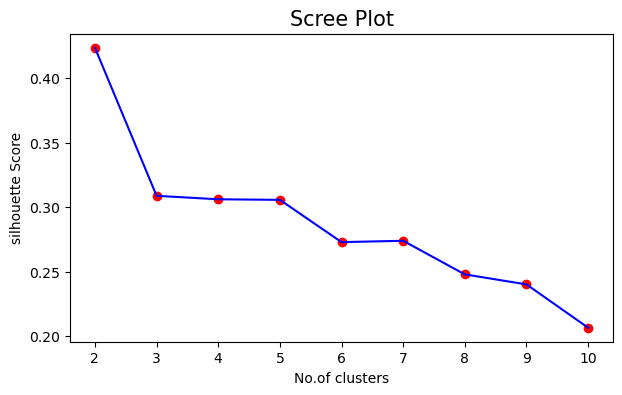

In [13]:
nc=range(2,11)
sc_score=[]    
for i in range(2,11):
    clusterer = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='complete')
    y = clusterer.fit_predict(df_norm)

    silhouette_avg = silhouette_score(df_norm, y)
    sc_score.append(silhouette_avg)
    print("For ", i ,"clusters "
          "The average silhouette_score is :", silhouette_avg)
    
plt.figure(figsize=(7,4))
plt.title('Scree Plot',fontsize=15)
plt.xlabel('No.of clusters',fontsize= 10)
plt.ylabel('silhouette Score', fontsize= 10)
plt.plot(nc,sc_score,color="blue")
plt.scatter(nc,sc_score,color="red")
plt.show()

###### 
+ The above plot shows that optimal number of clusters is 3

In [14]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc.fit_predict(df_norm)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

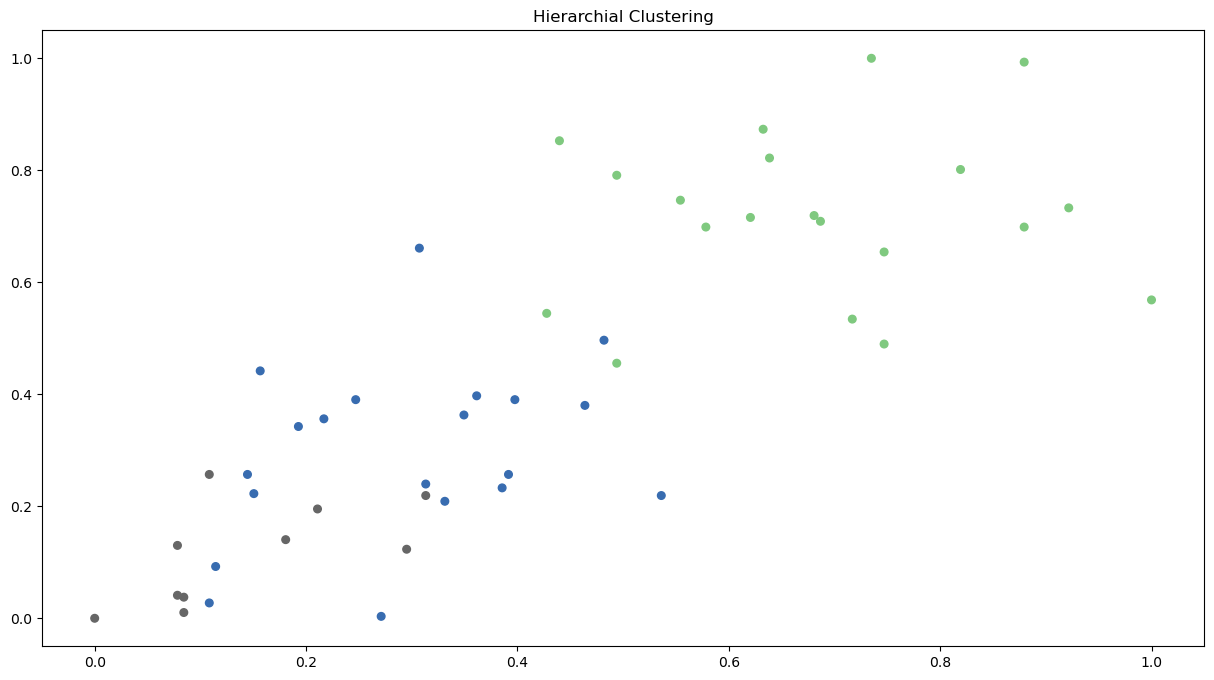

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c= hc.fit_predict(df_norm), s = 30, cmap = "Accent")
plt.title('Hierarchial Clustering')
plt.show()

In [16]:
data['H_clusterid'] = hc.fit_predict(df_norm)
data

,state,Murder,Assault,UrbanPop,Rape,H_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [17]:
data1=data.sort_values('H_clusterid')
data1.iloc[:,[0,-1]]

,state,H_clusterid
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0


In [18]:
data.groupby('H_clusterid').agg(['mean']).reset_index()

,H_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165,255.25,68.4,29.165
1,1,5.715,132.30,70.8,18.100
2,2,3.180,78.70,49.3,11.630


In [19]:
for i in np.array([0,1,2]):
    print('States that belong to Cluster Index',i)
    display(data[data["H_clusterid"] == i])
    print('\n')

States that belong to Cluster Index 0


,state,Murder,Assault,UrbanPop,Rape,H_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0




States that belong to Cluster Index 1


,state,Murder,Assault,UrbanPop,Rape,H_clusterid
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
29,New Jersey,7.4,159,89,18.8,1




States that belong to Cluster Index 2


,state,Murder,Assault,UrbanPop,Rape,H_clusterid
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


# KMeans Clustering

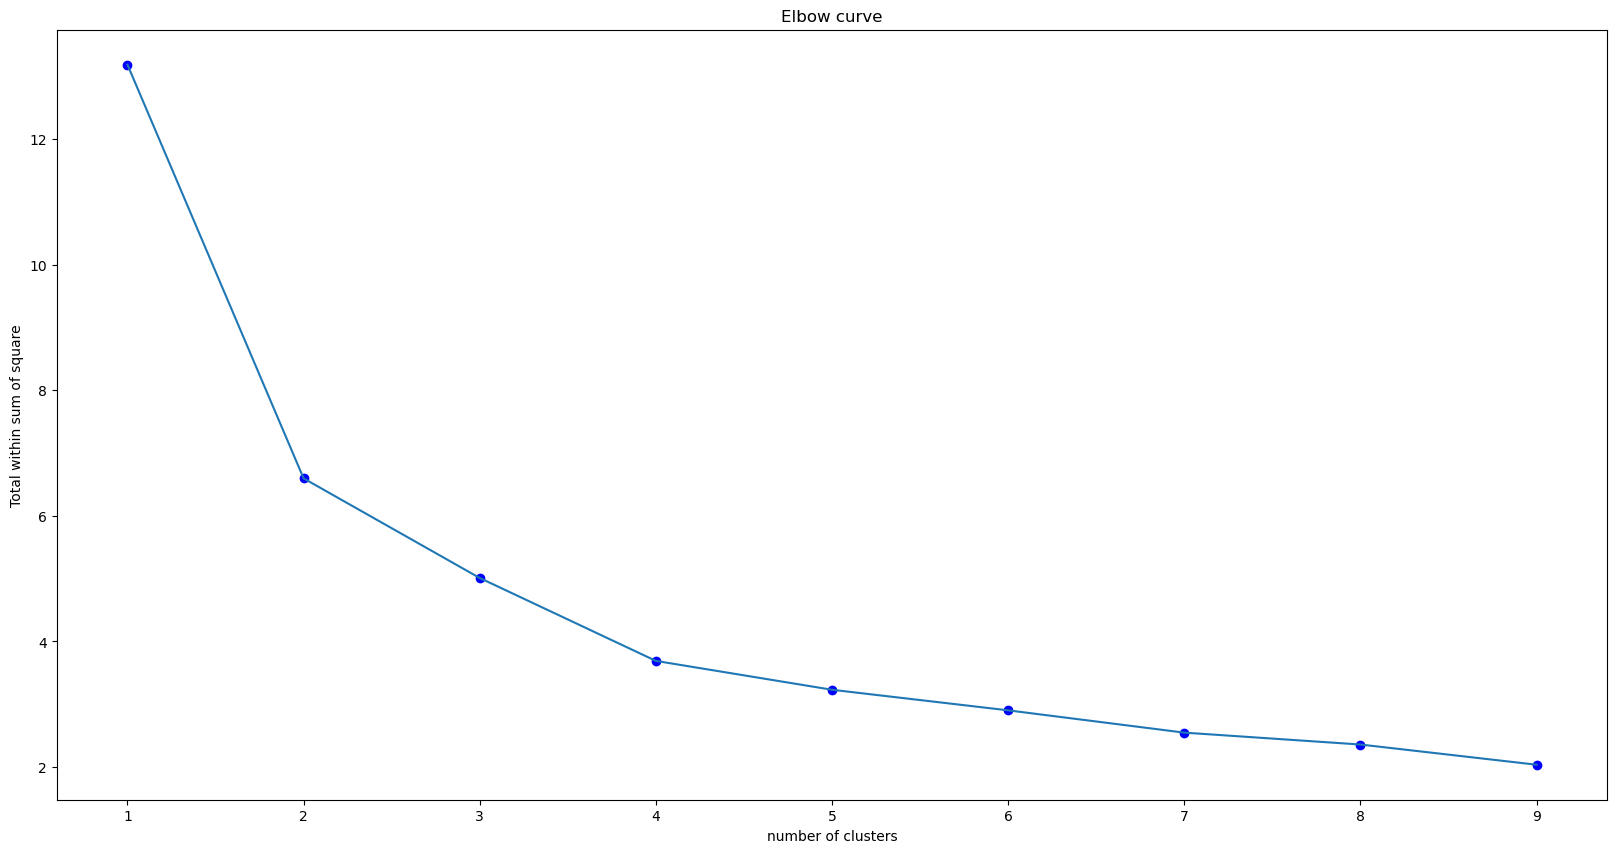

In [20]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,10),wcss)
plt.scatter(range(1,10),wcss,color="b")
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('Total within sum of square')
plt.show()

###### 
+ The above Elbow curve shows that Optimal number of clusters is  4

In [21]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [22]:
model_kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [23]:
model_kmeans.fit(df_norm).cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [24]:
model_kmeans.fit(df_norm).labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

###### Plotting Clustered Data with Centroids

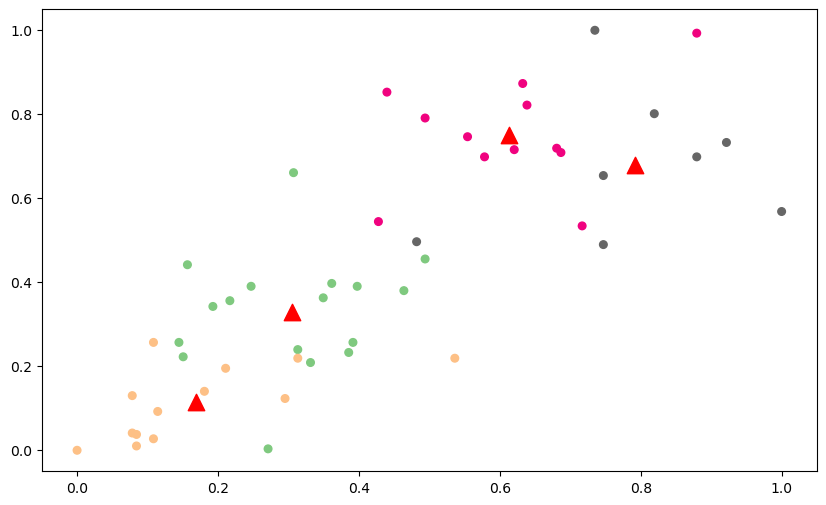

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c= model_kmeans.fit(df_norm).labels_, s = 30, cmap = "Accent")
centers = model_kmeans.fit(df_norm).cluster_centers_                           
plt.scatter(centers[:,0], centers[:,1], c = "red", s = 140, alpha =1,marker='^')

In [26]:
data["K_labels"]=pd.Series(model_kmeans.labels_)
data

,state,Murder,Assault,UrbanPop,Rape,H_clusterid,K_labels
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,1,3
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,1,2
7,Delaware,5.9,238,72,15.8,1,2
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,0,3


In [27]:
data2=data.sort_values('K_labels')
data2.iloc[:,[0,-1]]

,state,K_labels
16,Kentucky,0
28,New Hampshire,0
26,Nebraska,0
25,Montana,0
48,Wisconsin,0
22,Minnesota,0
18,Maine,0
40,South Dakota,0
14,Iowa,0
11,Idaho,0


In [28]:
data.groupby('K_labels').agg(['mean']).reset_index().drop(['H_clusterid'],axis=1)

,K_labels,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.966667,264.000000,76.500000,33.608333
2,2,5.852941,141.176471,73.647059,19.335294
3,3,13.937500,243.625000,53.750000,21.412500


In [29]:
for i in np.array([0,1,2,3]):
    print('States that belong to Cluster Index',i)
    display(data[data["K_labels"] == i].drop(['H_clusterid'],axis=1))
    print('\n')

States that belong to Cluster Index 0


,state,Murder,Assault,UrbanPop,Rape,K_labels
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
40,South Dakota,3.8,86,45,12.8,0




States that belong to Cluster Index 1


,state,Murder,Assault,UrbanPop,Rape,K_labels
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1




States that belong to Cluster Index 2


,state,Murder,Assault,UrbanPop,Rape,K_labels
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
13,Indiana,7.2,113,65,21.0,2
15,Kansas,6.0,115,66,18.0,2
20,Massachusetts,4.4,149,85,16.3,2
24,Missouri,9.0,178,70,28.2,2
29,New Jersey,7.4,159,89,18.8,2
34,Ohio,7.3,120,75,21.4,2
35,Oklahoma,6.6,151,68,20.0,2




States that belong to Cluster Index 3


,state,Murder,Assault,UrbanPop,Rape,K_labels
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


# DBSCAN

###### Standardizing The Data

In [30]:
st_data = pd.DataFrame(StandardScaler().fit_transform(data.iloc[:,1:5]), columns= df_norm.columns)
st_data

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


### Hyperparameter Tuning for epsilon value

In [31]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(st_data)
distances, indices = nbrs.kneighbors(st_data)

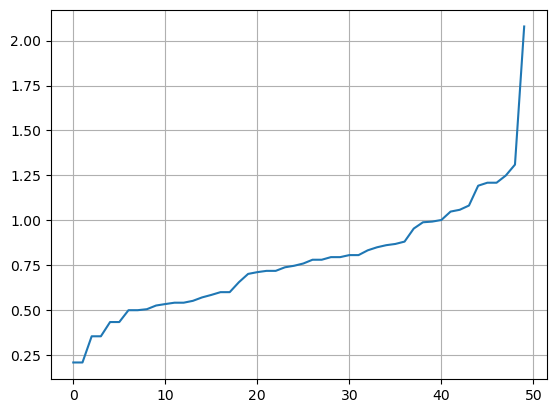

In [32]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()

###### 
+ The optimal value for epsilon will be found at the point of maximum curvature.
+ We train our model, selecting 1.25 for eps and setting min_samples to 4.

In [33]:
dbs = DBSCAN(eps=1.25, min_samples=4)
dbs.fit(st_data)

DBSCAN(eps=1.25, min_samples=4)

In [34]:
clusters = dbs.labels_
clusters

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [35]:
data['DBS_clusterID'] = dbs.labels_

In [36]:
data

,state,Murder,Assault,UrbanPop,Rape,H_clusterid,K_labels,DBS_clusterID
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,3,1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,1
6,Connecticut,3.3,110,77,11.1,1,2,1
7,Delaware,5.9,238,72,15.8,1,2,1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,3,0


In [37]:
for i in np.array([-1,0,1]):
    print('States that belong to Cluster Index',i)
    display(data[data["DBS_clusterID"] == i].drop(['H_clusterid','K_labels'],axis=1))
    print('\n')

States that belong to Cluster Index -1


,state,Murder,Assault,UrbanPop,Rape,DBS_clusterID
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
27,Nevada,12.2,252,81,46.0,-1




States that belong to Cluster Index 0


,state,Murder,Assault,UrbanPop,Rape,DBS_clusterID
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0




States that belong to Cluster Index 1


,state,Murder,Assault,UrbanPop,Rape,DBS_clusterID
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
12,Illinois,10.4,249,83,24.0,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1


In [38]:
# Noisy points of the data
print('State that are in noise')
data[data['DBS_clusterID'] == -1].state

State that are in noise


1         Alaska
4     California
8        Florida
27        Nevada
Name: state, dtype: object

In [39]:
data

,state,Murder,Assault,UrbanPop,Rape,H_clusterid,K_labels,DBS_clusterID
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,3,1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,1
6,Connecticut,3.3,110,77,11.1,1,2,1
7,Delaware,5.9,238,72,15.8,1,2,1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,3,0
